In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
df = pd.read_csv("./국민건강보험공단_건강검진정보_20191231.csv", encoding='cp949')
df.head()

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치 유무,치아마모증유무,제3대구치(사랑니) 이상,치석,데이터 공개일자
0,2019,1,11,1,13,165,65,90.0,1.5,1.2,...,47.0,2.0,NaN,1,0.0,미시행,미시행,미시행,1.0,20191231
1,2019,2,48,2,5,155,45,64.0,1.2,0.5,...,13.0,1.0,1.0,0,NaN,미시행,미시행,미시행,NaN,20191231
2,2019,3,41,1,13,160,70,87.0,0.9,0.8,...,17.0,1.0,1.0,0,NaN,미시행,미시행,미시행,NaN,20191231
3,2019,4,28,1,12,170,60,85.0,0.4,1.2,...,32.0,2.0,1.0,0,NaN,미시행,미시행,미시행,NaN,20191231
4,2019,5,41,1,10,170,70,81.2,0.7,0.7,...,19.0,2.0,NaN,0,NaN,미시행,미시행,미시행,NaN,20191231


In [3]:
df.columns.values

array(['기준년도', '가입자 일련번호', '시도코드', '성별코드', '연령대 코드(5세단위)', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기 혈압',
       '이완기 혈압', '식전혈당(공복혈당)', '총 콜레스테롤', '트리글리세라이드', 'HDL 콜레스테롤',
       'LDL 콜레스테롤', '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT',
       '감마 지티피', '흡연상태', '음주여부', '구강검진 수검여부', '치아우식증유무', '결손치 유무',
       '치아마모증유무', '제3대구치(사랑니) 이상', '치석', '데이터 공개일자'], dtype=object)

In [4]:
new_cols = ["HCHK_YEAR", "IDV_ID", "SIDO", "SEX", "AGE_GROUP", "HEIGHT", "WEIGHT", "WAIST", "SIGHT_LEFT", 
            "SIGHT_RIGHT", "HEAR_LEFT", "HEAR_RIGHT", "BP_HIGH", "BP_LWST", "BLDS", "TOT_CHOLE", "TRIGLYCERIDE",
            "HDL_CHOLE", "LDL_CHOLE", "HMG", "OLIG_PROTE_CD", "CREATININE", "SGOT_AST", "SGPT_ALT", "GAMMA_GTP",
            "SMK_STAT_TYPE_CD", "DRK_YN", "HCHK_OE_INSPEC_YN", "CRS_YN", "TTH_MSS_YN", "ODT_TRB_YN", "WSDM_DIS_YN", 
            "TTR_YN", "DATA_STD__DT"]
for i in range(len(new_cols)):
    new_cols[i] = new_cols[i].lower()

In [5]:
df.columns = new_cols
df.head()

,hchk_year,idv_id,sido,sex,age_group,height,weight,waist,sight_left,sight_right,...,gamma_gtp,smk_stat_type_cd,drk_yn,hchk_oe_inspec_yn,crs_yn,tth_mss_yn,odt_trb_yn,wsdm_dis_yn,ttr_yn,data_std__dt
0,2019,1,11,1,13,165,65,90.0,1.5,1.2,...,47.0,2.0,NaN,1,0.0,미시행,미시행,미시행,1.0,20191231
1,2019,2,48,2,5,155,45,64.0,1.2,0.5,...,13.0,1.0,1.0,0,NaN,미시행,미시행,미시행,NaN,20191231
2,2019,3,41,1,13,160,70,87.0,0.9,0.8,...,17.0,1.0,1.0,0,NaN,미시행,미시행,미시행,NaN,20191231
3,2019,4,28,1,12,170,60,85.0,0.4,1.2,...,32.0,2.0,1.0,0,NaN,미시행,미시행,미시행,NaN,20191231
4,2019,5,41,1,10,170,70,81.2,0.7,0.7,...,19.0,2.0,NaN,0,NaN,미시행,미시행,미시행,NaN,20191231


In [7]:
sum(df["height"].isnull()), sum(df["weight"].isnull())

(0, 0)

In [8]:
bmi_df = df[["height", "weight", "ldl_chole"]]
print(bmi_df.shape)
bmi_df.head()

(1000000, 3)


,height,weight,ldl_chole
0,165,65,NaN
1,155,45,NaN
2,160,70,152.0
3,170,60,NaN
4,170,70,NaN


In [9]:
bmi_df.dropna(subset=["ldl_chole"], inplace=True)
bmi_df.reset_index(inplace=True)
bmi_df.drop("index", axis=1, inplace=True)

print(bmi_df.shape)
bmi_df.head()

(327148, 3)


,height,weight,ldl_chole
0,160,70,152.0
1,170,110,150.0
2,175,70,93.0
3,170,75,122.0
4,150,65,176.0


In [10]:
bmi_df["bmi"] = bmi_df["weight"] / ((bmi_df["height"]*1e-2)**2)
bmi_df.head()

,height,weight,ldl_chole,bmi
0,160,70,152.0,27.343750
1,170,110,150.0,38.062284
2,175,70,93.0,22.857143
3,170,75,122.0,25.951557
4,150,65,176.0,28.888889


In [11]:
bmi_df.bmi = bmi_df.bmi.round(0).astype(int)
bmi_df.bmi

# 참고: https://www.delftstack.com/ko/howto/python-pandas/how-to-convert-float-to-int-in-pandas-dataframe/https://www.delftstack.com/ko/howto/python-pandas/how-to-convert-float-to-int-in-pandas-dataframe/

0         27
1         38
2         23
3         26
4         29
          ..
327143    25
327144    26
327145    20
327146    25
327147    19
Name: bmi, Length: 327148, dtype: int64

In [12]:
bmi_df["bmi_rate"] = ""

bmi_df.loc[30 <= bmi_df["bmi"], "bmi_rate"] = "obesity"
bmi_df.loc[bmi_df["bmi"] <= 29, "bmi_rate"] = "overweight"
bmi_df.loc[bmi_df["bmi"] <= 24, "bmi_rate"] = "normal"
bmi_df.loc[bmi_df["bmi"] < 20, "bmi_rate"] = "underweight"

In [13]:
print(sum(bmi_df["bmi_rate"].isnull()))
bmi_df["bmi_rate"].value_counts()

0


normal         175141
overweight     113991
underweight     21165
obesity         16851
Name: bmi_rate, dtype: int64

In [14]:
bmi_df["ldl_rate"] = ""

bmi_df.loc[160 <= bmi_df["ldl_chole"], "ldl_rate"] = "high"
bmi_df.loc[bmi_df["ldl_chole"] <= 159, "ldl_rate"] = "warning"
bmi_df.loc[bmi_df["ldl_chole"] < 130, "ldl_rate"] = "normal"

print(sum(bmi_df["ldl_rate"].isnull()))
bmi_df["ldl_rate"].value_counts()

0


normal     224233
warning     69987
high        32928
Name: ldl_rate, dtype: int64

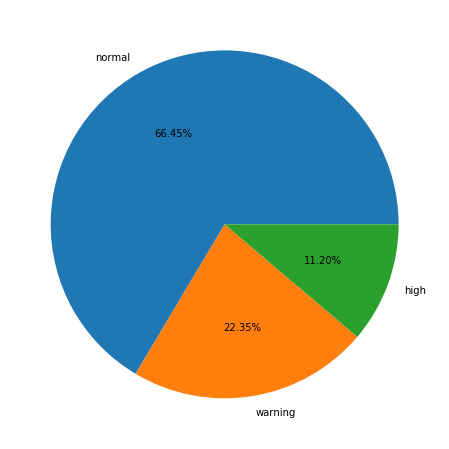

In [15]:
ldl_rate = bmi_df.loc[bmi_df["bmi_rate"]=="obesity", "ldl_rate"].value_counts()

fig = plt.figure(figsize=(8, 8))
plt.pie(ldl_rate, labels=ldl_rate.index, autopct='%1.2f%%')

plt.show()

# 참고: https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_features.html